In [28]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import get_file

try:
    path = 'E:/Datasets/NSL/KDDTrain+.txt'
except:
    print('Error downloading')
    raise
    
print(path) 

df = pd.read_csv(path, header=None)
#Append with the Test Dataset
#df += pd.read_csv('E:/Datasets/NSL/KDDTest+.txt', header=None)

print("Read {} rows.".format(len(df)))

df.dropna(inplace=True,axis=1) # For now, just drop NA's 
# (rows with missing values)


df.columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","outcome","difficulty"]

pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 5)

# display 5 rows
display(df[0:5])

E:/Datasets/NSL/KDDTrain+.txt
Read 125973 rows.


,duration,protocol_type,...,outcome,difficulty
0,0,tcp,...,normal,20
1,0,udp,...,normal,15
2,0,tcp,...,neptune,19
3,0,tcp,...,normal,21
4,0,tcp,...,normal,21


In [31]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

In [32]:
print("Read {} rows.".format(len(df)))
print('='*40)
print('The number of data points are:', df.shape[0])
print('='*40)
print('The number of features are:', df.shape[1])
print('='*40)
output = df['outcome'].values
labels = set(output)
print('The different type of output labels are:', labels)
print('='*125)
print('The number of different output labels are:', len(labels))

Read 125973 rows.
The number of data points are: 125973
The number of features are: 43
The different type of output labels are: {'land', 'perl', 'warezclient', 'satan', 'multihop', 'smurf', 'portsweep', 'neptune', 'pod', 'guess_passwd', 'ipsweep', 'spy', 'buffer_overflow', 'ftp_write', 'teardrop', 'loadmodule', 'normal', 'back', 'imap', 'rootkit', 'phf', 'nmap', 'warezmaster'}
The number of different output labels are: 23


In [33]:
# Data Cleaning

# Checking for NULL values
print('Null values in dataset are',len(df[df.isnull().any(1)]))
print('='*40)

# Checkng for DUPLICATE values
df.drop_duplicates(keep='first', inplace = True)

# For now, just drop NA's (rows with missing values)
df.dropna(inplace=True,axis=1) 

# stored the data into a pickle file so we can load through
# df.to_pickle('df.pkl')

print("Read {} rows.".format(len(df)))

Null values in dataset are 0
Read 125973 rows.


In [34]:
# Analyze NSL-KDD
analyze(df)


125973 rows
** duration:2981 (2%)
** protocol_type:[tcp:81.52%,udp:11.9%,icmp:6.58%]
** service:[http:32.02%,private:17.35%,domain_u:7.18%,smtp:5.81%,ftp_data:5.45%,eco_i:3.64%,other:3.46%,ecr_i:2.44%,telnet:1.87%,finger:1.4%,ftp:1.39%,auth:0.76%,Z39_50:0.68%,uucp:0.62%,courier:0.58%,bgp:0.56%,whois:0.55%,uucp_path:0.55%,iso_tsap:0.55%,time:0.52%,imap4:0.51%,nnsp:0.5%,vmnet:0.49%,urp_i:0.48%,domain:0.45%,ctf:0.45%,csnet_ns:0.43%,supdup:0.43%,discard:0.43%,http_443:0.42%,daytime:0.41%,gopher:0.41%,efs:0.39%,systat:0.38%,link:0.38%,exec:0.38%,hostnames:0.37%,name:0.36%,mtp:0.35%,echo:0.34%,klogin:0.34%,login:0.34%,ldap:0.33%,netbios_dgm:0.32%,sunrpc:0.3%,netbios_ssn:0.29%,netstat:0.29%,netbios_ns:0.28%,ssh:0.25%,kshell:0.24%,nntp:0.23%,pop_3:0.21%,sql_net:0.19%,IRC:0.15%,ntp_u:0.13%,rje:0.07%,remote_job:0.06%,pop_2:0.06%,X11:0.06%,printer:0.05%,shell:0.05%,urh_i:0.01%,tim_i:0.01%,red_i:0.01%,pm_dump:0.0%,tftp_u:0.0%,aol:0.0%,http_8001:0.0%,harvest:0.0%,http_2784:0.0%]
** flag:[SF:59.49%

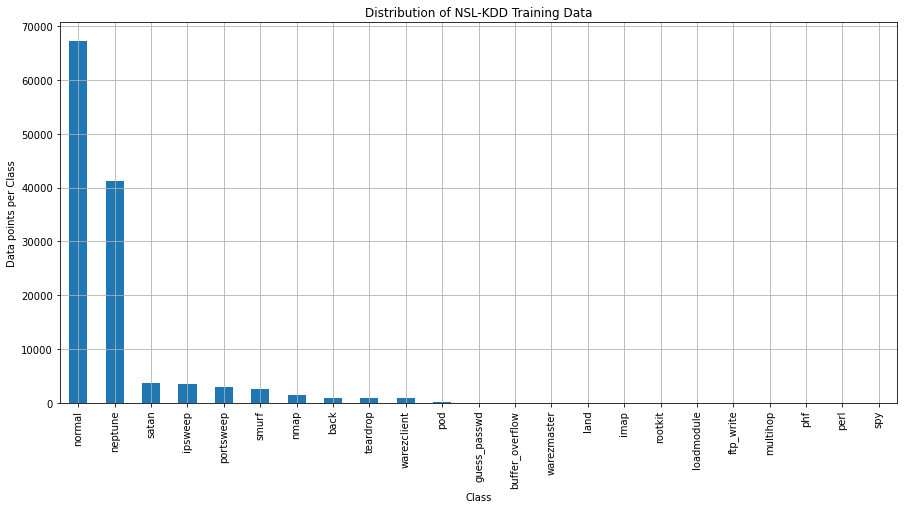

In [35]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['outcome'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of NSL-KDD Training Data')
plt.grid()
plt.show()

In [36]:
# After Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class normal : 67343 ( 53.458 %)
Number of data points in class neptune : 41214 ( 32.717 %)
Number of data points in class satan : 3633 ( 2.884 %)
Number of data points in class ipsweep : 3599 ( 2.857 %)
Number of data points in class portsweep : 2931 ( 2.327 %)
Number of data points in class smurf : 2646 ( 2.1 %)
Number of data points in class nmap : 1493 ( 1.185 %)
Number of data points in class back : 956 ( 0.759 %)
Number of data points in class teardrop : 892 ( 0.708 %)
Number of data points in class warezclient : 890 ( 0.707 %)
Number of data points in class pod : 201 ( 0.16 %)
Number of data points in class guess_passwd : 53 ( 0.042 %)
Number of data points in class buffer_overflow : 30 ( 0.024 %)
Number of data points in class warezmaster : 20 ( 0.016 %)
Number of data points in class land : 18 ( 0.014 %)
Number of data points in class imap : 11 ( 0.009 %)
Number of data points in class rootkit : 10 ( 0.008 %)
Number of data points in class loadmodule :

In [37]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
# Encode text values to dummy variables(i.e. [1,0,0],
# [0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [38]:
# Now encode the feature vector

encode_numeric_zscore(df, 'duration')
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_numeric_zscore(df, 'src_bytes')
encode_numeric_zscore(df, 'dst_bytes')
encode_text_dummy(df, 'land')
encode_numeric_zscore(df, 'wrong_fragment')
encode_numeric_zscore(df, 'urgent')
encode_numeric_zscore(df, 'hot')
encode_numeric_zscore(df, 'num_failed_logins')
encode_text_dummy(df, 'logged_in')
encode_numeric_zscore(df, 'num_compromised')
encode_numeric_zscore(df, 'root_shell')
encode_numeric_zscore(df, 'su_attempted')
encode_numeric_zscore(df, 'num_root')
encode_numeric_zscore(df, 'num_file_creations')
encode_numeric_zscore(df, 'num_shells')
encode_numeric_zscore(df, 'num_access_files')
encode_numeric_zscore(df, 'num_outbound_cmds')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
encode_numeric_zscore(df, 'count')
encode_numeric_zscore(df, 'srv_count')
encode_numeric_zscore(df, 'serror_rate')
encode_numeric_zscore(df, 'srv_serror_rate')
encode_numeric_zscore(df, 'rerror_rate')
encode_numeric_zscore(df, 'srv_rerror_rate')
encode_numeric_zscore(df, 'same_srv_rate')
encode_numeric_zscore(df, 'diff_srv_rate')
encode_numeric_zscore(df, 'srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_count')
encode_numeric_zscore(df, 'dst_host_srv_count')
encode_numeric_zscore(df, 'dst_host_same_srv_rate')
encode_numeric_zscore(df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_serror_rate')
encode_numeric_zscore(df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(df, 'dst_host_rerror_rate')
encode_numeric_zscore(df, 'dst_host_srv_rerror_rate')

# display 5 rows

df.dropna(inplace=True,axis=1)
df[0:5]
# This is the numeric feature vector, as it goes to the neural net


# Convert to numpy - Classification
x_columns = df.columns.drop('outcome')
x = df[x_columns].values
dummies = pd.get_dummies(df['outcome']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

In [64]:
import pandas as pd
import io
import requests
import numpy as np

import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Create a test/train split.  25% test
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

# Create neural net
model = Sequential()
model.add(Dense(128, input_dim=x.shape[1], activation='relu'))
model.add(Dense(256, input_dim=x.shape[1], activation='relu'))
model.add(Dense(128, input_dim=x.shape[1], activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt)

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
2953/2953 - 2s - loss: 1.3978 - val_loss: 0.5061
Epoch 2/1000
2953/2953 - 2s - loss: 0.4467 - val_loss: 0.4215
Epoch 3/1000
2953/2953 - 2s - loss: 0.3930 - val_loss: 0.3834
Epoch 4/1000
2953/2953 - 2s - loss: 0.3606 - val_loss: 0.3565
Epoch 5/1000
2953/2953 - 2s - loss: 0.3370 - val_loss: 0.3360
Epoch 6/1000
2953/2953 - 2s - loss: 0.3181 - val_loss: 0.3192
Epoch 7/1000
2953/2953 - 2s - loss: 0.3026 - val_loss: 0.3046
Epoch 8/1000
2953/2953 - 2s - loss: 0.2896 - val_loss: 0.2929
Epoch 9/1000
2953/2953 - 2s - loss: 0.2789 - val_loss: 0.2827
Epoch 10/1000
2953/2953 - 2s - loss: 0.2699 - val_loss: 0.2743
Epoch 11/1000
2953/2953 - 2s - loss: 0.2623 - val_loss: 0.2676
Epoch 12/1000
2953/2953 - 2s - loss: 0.2562 - val_loss: 0.2616
Epoch 13/1000
2953/2953 - 2s - loss: 0.2507 - val_loss: 0.2565
Epoch 14/1000
2953/2953 - 2s - loss: 0.2458 - val_loss: 0.2516
Epoch 15/1000
2953/2953 - 2s - loss: 0.2411 - val_loss: 0.2473
Epoch 16/1000
2953/2953 - 2s - loss: 0.2367 - val_loss: 0.2429
E

In [65]:
import tensorflow.keras.backend as K
print('Learning Rate - ')
print(K.eval(model.optimizer.lr)) 
print('==================================')
model.summary()

Learning Rate - 
1e-04
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 128)               16256     
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 129       
_________________________________________________________________
dense_31 (Dense)             (None, 23)                46        
Total params: 16,431
Trainable params: 16,431
Non-trainable params: 0
_________________________________________________________________


In [66]:
import seaborn as sns
import datetime as dt

def confusion_matrix_func(y_test, y_test_pred):
    
    '''
    This function computes the confusion matrix using Predicted and Actual values and plots a confusion matrix heatmap
    '''
    C = confusion_matrix(y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    
    print(C)
    print("====================")
    print (cm_df)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit', 
'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf', 'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()

# calculate roc curve
from sklearn.metrics import *
#fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, pred)
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    pred = lb.transform(pred)
    return roc_auc_score(y_test, pred, average=average)

In [67]:
# Measure accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
# calculate roc curve
from sklearn.metrics import *
#fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, pred)
from sklearn import preprocessing

start = dt.datetime.now()

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

escore = model.evaluate(x_test, y_test, batch_size=32)

y_eval = np.argmax(y_test,axis=1)

score = accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

985/985 [==============================] - 0s 372us/step - loss: 0.1297
Completed
Time taken: 0:00:00.850167
Validation score: 0.9723121864482124
Evaluation score: 0.12970981001853943
Recall score: 0.9723121864482124
Precision score: 0.9603858224199563
F1 Measure score: 0.9652644902215337
ROC-AUC score: 0.6822716210207778


C:\Users\Maruata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#confusion_matrix(y_eval, pred)